# Client_attrition for classification

Your task is to apply various ML algorithms (see the rules below) to build a model explaining the weight of the newborn child based on the training sample and generate predictions for all observations from the test sample.

**The dataset includes 2398116 observations in the training sample and 599561 in the test sample and the following columns:**

* mother_body_mass_index – Body Mass Index of the mother
* mother_marital_status – is mother married? (1 = Yes, 2 = No)
* mother_delivery_weight – mother’s weight at delivery in pounds
* mother_race – race of the mother (1 = White (alone); 2 = Black (alone); 3 = AIAN (alone); 4 Asian (alone); 5 = NHOPI (alone); 6 = More than one race)
* mother_height – height of the mother in inches
* mother_weight_gain – mother’s weight gain during the pregnancy (in pounds)
* father_age – age of the father
* father_education – education of the father (1 = 8th grade or less; 2 = 9-12th grade, no diploma; 3 = High school graduate or GED completed; 4 = Some college credit but no degree; 5 = Associate degree; 6 = Bachelor’s degree; 7 = Master’s degree; 8 = Doctorate or Professional degree; 9 = unknown)
* cigarettes_before_pregnancy – number of cigarettes smoked daily by the mother before pregnancy (00-97 = number of cigarettes daily, 98 = 98 or more cigarettes daily)
* prenatal_care_month – pregnancy month in which prenatal care began (99 = no prenatal care)
* number_prenatal_visits – number of prenatal visits
* previous_cesarean – was there any previous cesarean delivery before (N = No; Y = Yes; U = Other)
* newborn_gender – gender of the newborn (F = female; M = male)
* newborn_weight – weight of the newborn in grams (outcome variable, only in the training sample)

## Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from pathlib import Path
from sklearn.model_selection import train_test_split

### Data preparation

In [97]:
df = pd.read_csv('../data/input/newborn_train.csv')
df.sample(20)


,mother_body_mass_index,mother_marital_status,mother_delivery_weight,mother_race,mother_height,mother_weight_gain,father_age,father_education,cigarettes_before_pregnancy,prenatal_care_month,number_prenatal_visits,previous_cesarean,newborn_gender,newborn_weight
1785725,31.6,1.0,205.0,1,66.0,9.0,41.0,1,0.0,5,12.0,Y,F,3799
200580,27.1,2.0,192.0,1,66.0,24.0,NaN,9,5.0,4,13.0,N,F,3681
617325,19.0,1.0,131.0,1,62.0,27.0,26.0,2,0.0,2,15.0,N,F,3375
1204268,27.5,2.0,198.0,1,63.0,43.0,25.0,4,0.0,3,13.0,N,M,3710
503058,24.3,1.0,188.0,1,62.0,55.0,32.0,5,0.0,2,10.0,Y,M,4054
500435,20.6,1.0,150.0,1,64.0,30.0,30.0,3,0.0,4,7.0,N,F,2945
1644582,25.2,1.0,187.0,1,66.0,31.0,35.0,7,0.0,2,17.0,Y,M,3856
675312,17.2,2.0,119.0,1,64.0,19.0,NaN,9,0.0,3,8.0,N,M,2353
881228,28.3,1.0,208.0,1,63.0,48.0,31.0,3,0.0,4,8.0,N,M,3033
1277331,29.4,2.0,228.0,1,67.0,40.0,27.0,3,0.0,2,10.0,N,M,2260


In [98]:
df.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)


,mean,std,min,50%,max
mother_body_mass_index,27.167210,6.755758,13.0,25.7,69.8
mother_marital_status,1.399560,0.489808,1.0,1.0,2.0
mother_delivery_weight,188.316981,41.369241,100.0,181.0,400.0
mother_race,1.522342,1.111554,1.0,1.0,6.0
mother_height,64.121252,2.835525,30.0,64.0,78.0
mother_weight_gain,29.483728,15.146299,0.0,29.0,98.0
father_age,31.801093,6.812647,11.0,31.0,98.0
father_education,4.904241,2.305806,1.0,4.0,9.0
cigarettes_before_pregnancy,1.104388,4.730520,0.0,0.0,98.0
prenatal_care_month,5.295876,15.055082,0.0,3.0,99.0


In [99]:
df.describe(include=[np.object_]).transpose().drop("count", axis=1)

,unique,top,freq
previous_cesarean,3,N,2020874
newborn_gender,2,M,1225891


In [100]:
# Getting the number of missing values in each column
num_missing = df.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / df.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
father_age,444506,18.535634
mother_marital_status,412510,17.201420
mother_height,244529,10.196713
mother_body_mass_index,146600,6.113132
mother_weight_gain,73473,3.063780
number_prenatal_visits,59901,2.497836
mother_delivery_weight,34958,1.457728
cigarettes_before_pregnancy,11301,0.471245


In [101]:
condition_BMI = (df['mother_body_mass_index'].isna()) & (~df['mother_delivery_weight'].isna()) & (~df['mother_height'].isna()) & (~df['mother_weight_gain'].isna())
condition_mother_weight_gain = (~df['mother_body_mass_index'].isna()) & (~df['mother_delivery_weight'].isna()) & (~df['mother_height'].isna()) & (df['mother_weight_gain'].isna())
condition_height = (~df['mother_body_mass_index'].isna()) & (~df['mother_delivery_weight'].isna()) & (df['mother_height'].isna()) & (~df['mother_weight_gain'].isna())
condition_mother_delivery_weight = (~df['mother_body_mass_index'].isna()) & (df['mother_delivery_weight'].isna()) & (~df['mother_height'].isna()) & (~df['mother_weight_gain'].isna())

df.loc[condition_BMI, 'mother_body_mass_index'] = (df.loc[condition_BMI, 'mother_delivery_weight'] - df.loc[condition_BMI, 'mother_weight_gain']) / (df.loc[condition_BMI, 'mother_height'] ** 2) * 703
df.loc[condition_height, 'mother_height'] = np.sqrt((df.loc[condition_height, 'mother_delivery_weight'] - df.loc[condition_height, 'mother_weight_gain']) / df.loc[condition_height, 'mother_body_mass_index'] * 703)
df.loc[condition_mother_delivery_weight, 'mother_delivery_weight'] = df.loc[condition_mother_delivery_weight, 'mother_body_mass_index'] * (df.loc[condition_mother_delivery_weight, 'mother_height'] ** 2) / 703 + df.loc[condition_mother_delivery_weight, 'mother_weight_gain']
df.loc[condition_mother_weight_gain, 'mother_weight_gain'] = df.loc[condition_mother_weight_gain, 'mother_delivery_weight'] - df.loc[condition_mother_weight_gain, 'mother_body_mass_index'] * (df.loc[condition_mother_weight_gain, 'mother_height'] ** 2) / 703
df['mother_marital_status'] = df['mother_marital_status'].fillna(0)
df['cigarettes_before_pregnancy'] = df['cigarettes_before_pregnancy'].fillna(0)
df['father_age'] = df['father_age'].fillna(round(df['father_age'].mean()))
df.loc[df['prenatal_care_month'] == 99, 'number_prenatal_visits'] = df.loc[df['prenatal_care_month'] == 99, 'number_prenatal_visits'].fillna(0)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df['prenatal_care_month'] = df['prenatal_care_month'].replace(99, 0)


In [102]:
def process_dataframe(df):
    condition_BMI = (df['mother_body_mass_index'].isna()) & (~df['mother_delivery_weight'].isna()) & (~df['mother_height'].isna()) & (~df['mother_weight_gain'].isna())
    condition_mother_weight_gain = (~df['mother_body_mass_index'].isna()) & (~df['mother_delivery_weight'].isna()) & (~df['mother_height'].isna()) & (df['mother_weight_gain'].isna())
    condition_height = (~df['mother_body_mass_index'].isna()) & (~df['mother_delivery_weight'].isna()) & (df['mother_height'].isna()) & (~df['mother_weight_gain'].isna())
    condition_mother_delivery_weight = (~df['mother_body_mass_index'].isna()) & (df['mother_delivery_weight'].isna()) & (~df['mother_height'].isna()) & (~df['mother_weight_gain'].isna())

    df.loc[condition_BMI, 'mother_body_mass_index'] = (df.loc[condition_BMI, 'mother_delivery_weight'] - df.loc[condition_BMI, 'mother_weight_gain']) / (df.loc[condition_BMI, 'mother_height'] ** 2) * 703
    df.loc[condition_height, 'mother_height'] = np.sqrt((df.loc[condition_height, 'mother_delivery_weight'] - df.loc[condition_height, 'mother_weight_gain']) / df.loc[condition_height, 'mother_body_mass_index'] * 703)
    df.loc[condition_mother_delivery_weight, 'mother_delivery_weight'] = df.loc[condition_mother_delivery_weight, 'mother_body_mass_index'] * (df.loc[condition_mother_delivery_weight, 'mother_height'] ** 2) / 703 + df.loc[condition_mother_delivery_weight, 'mother_weight_gain']
    df.loc[condition_mother_weight_gain, 'mother_weight_gain'] = df.loc[condition_mother_weight_gain, 'mother_delivery_weight'] - df.loc[condition_mother_weight_gain, 'mother_body_mass_index'] * (df.loc[condition_mother_weight_gain, 'mother_height'] ** 2) / 703

# Replace NaN values in 'cigarettes_before_pregnancy' column with 0

    df['cigarettes_before_pregnancy'] = df['cigarettes_before_pregnancy'].fillna(0)
    df['father_age'] = df['father_age'].fillna(round(df['father_age'].mean()))
    df.loc[df['prenatal_care_month'] == 99, 'number_prenatal_visits'] = df.loc[dfx['prenatal_care_month'] == 99, 'number_prenatal_visits'].fillna(0)
    df['mother_marital_status'] = df['mother_marital_status'].fillna(0)
    df = df.fillna(df.median())
    return df

In [103]:
# Getting the number of missing values in each column
num_missing = df.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]

# Getting the percentages of missing values
percent_missing = num_missing * 100 / df.shape[0]
# Concatenating the number and percentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)



,Missing Values,Percentage


## Splitting the data

In [104]:
# split the data into train and test randomly. 0.2 to test, 0.8 to train
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.to_csv('../data/output/df_train.csv', index=True)
df_test.to_csv('../data/output/df_test.csv', index=True)

df = df_train

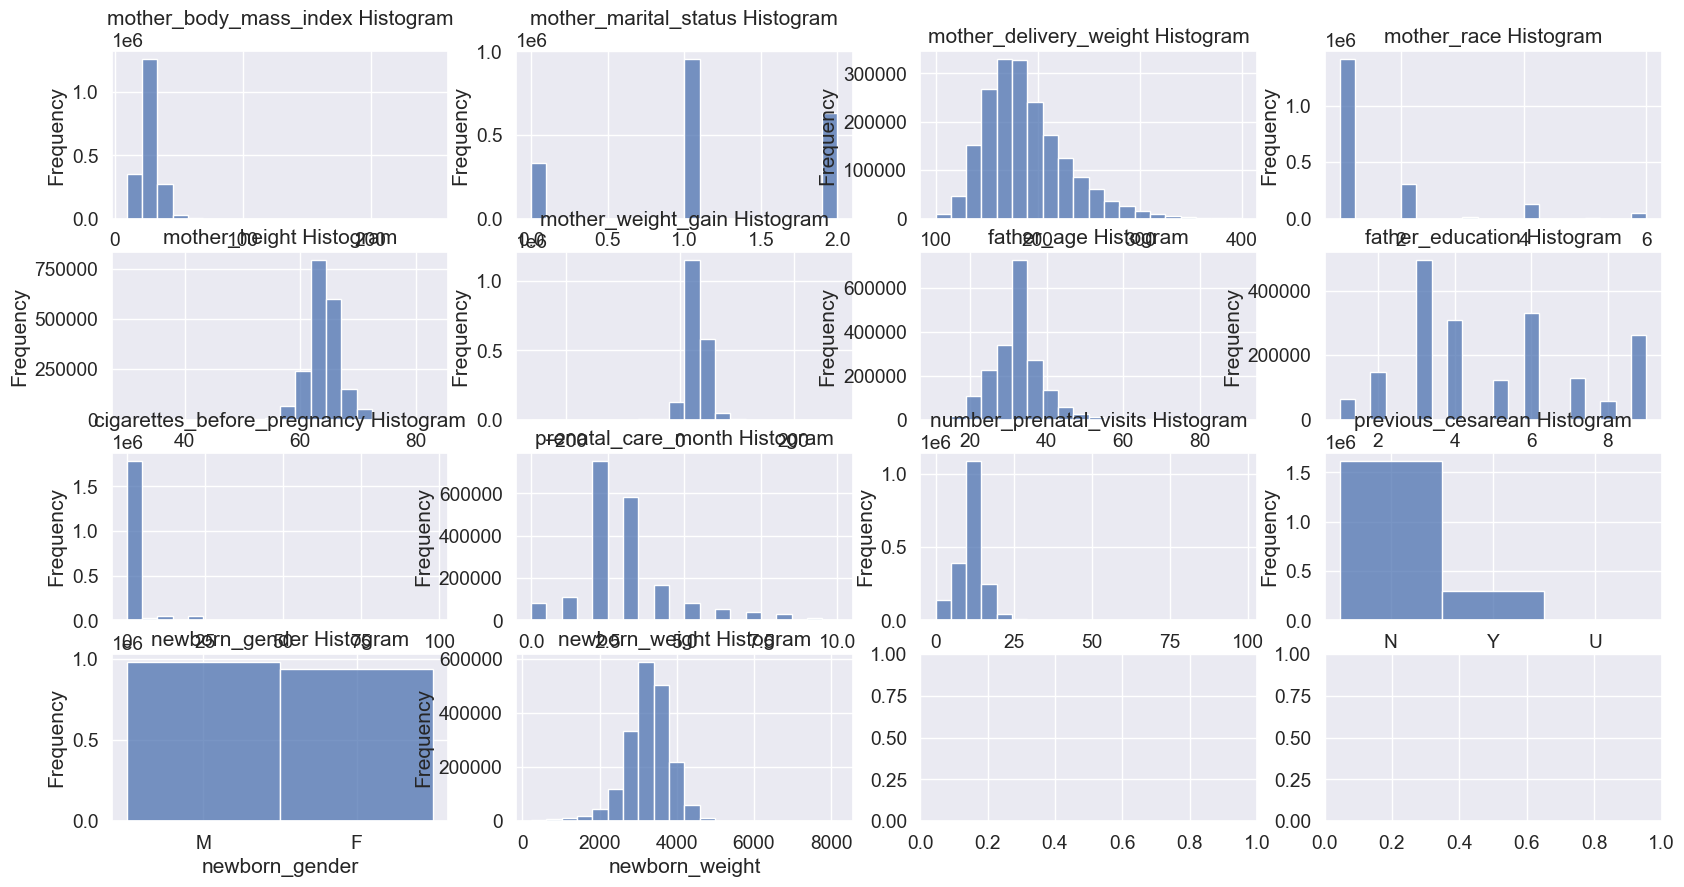

In [105]:
fig, axes = plt.subplots(ncols = 4, nrows = 4, figsize=(20,10))
axes = axes.flatten()
# Iterate over each column and create a histogram
for i, column in enumerate(df.columns):
    sns.histplot(data=df[column].dropna(), ax=axes[i], bins=20)
    axes[i].set_title(column + " Histogram")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
# Display the histograms
plt.show()

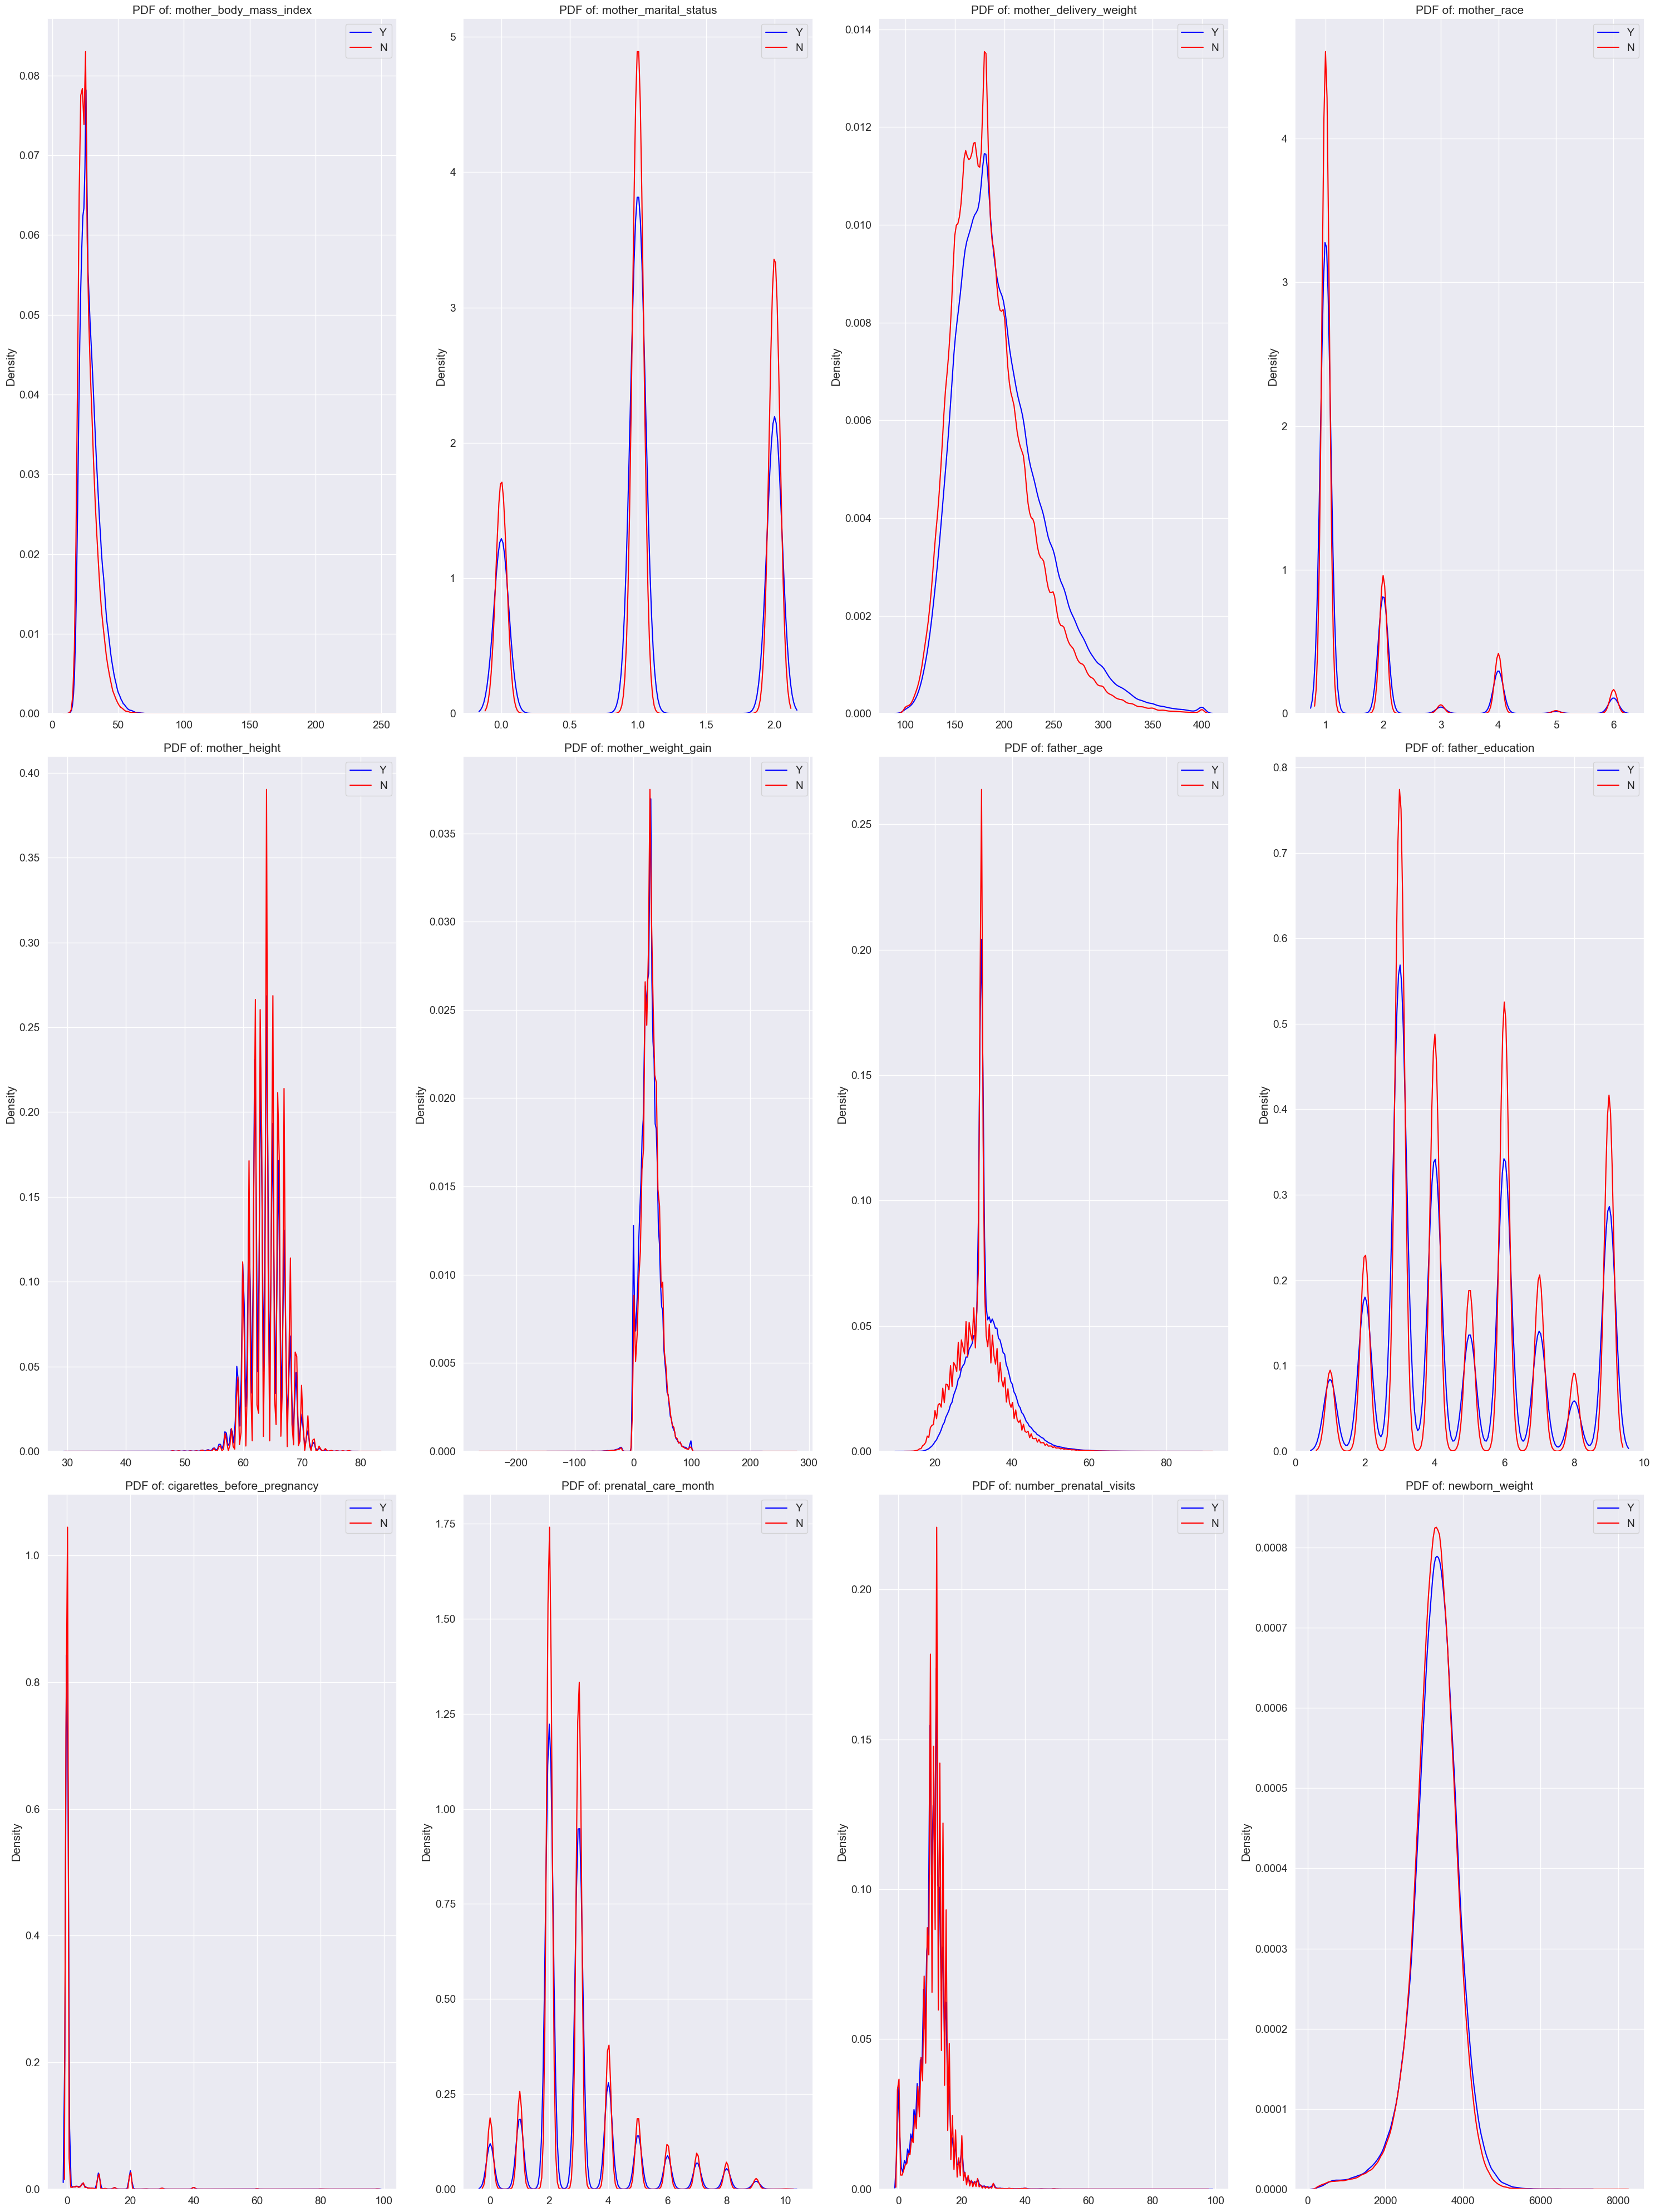

In [106]:
cont = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(30, 40))

colors = {"Y": "blue", "N": "red"}

for i, col in enumerate(cont):
    ax = axes.flatten()[i]
    for cesar, color in colors.items():
        sns.kdeplot(
            data=df[df.previous_cesarean == cesar][col],
            ax=ax,
            color=color,
        )
    ax.set_title(f"PDF of: {col}")
    ax.set_xlabel("")
    ax.legend(["Y", "N"])

plt.tight_layout()
plt.show()

In [107]:
#fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(30, 30))
#axes = axes.flatten()

# Iterate over each column and create a regression plot
#for i, column in enumerate(df.columns):
 #   ax = axes[i]
  #  sns.regplot(x=column, y='newborn_weight', data=df, ax=ax)
   # ax.set_xlabel(column)
    #ax.set_ylabel('Newborn Weight')

# Adjust the spacing between subplots
#plt.tight_layout()

# Display the plot
#plt.show()

c:\Users\micha\OneDrive\Dokumenty\GitHub\Machine_Learning_Regression\Machine_Learning_Regression\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
c:\Users\micha\OneDrive\Dokumenty\GitHub\Machine_Learning_Regression\Machine_Learning_Regression\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


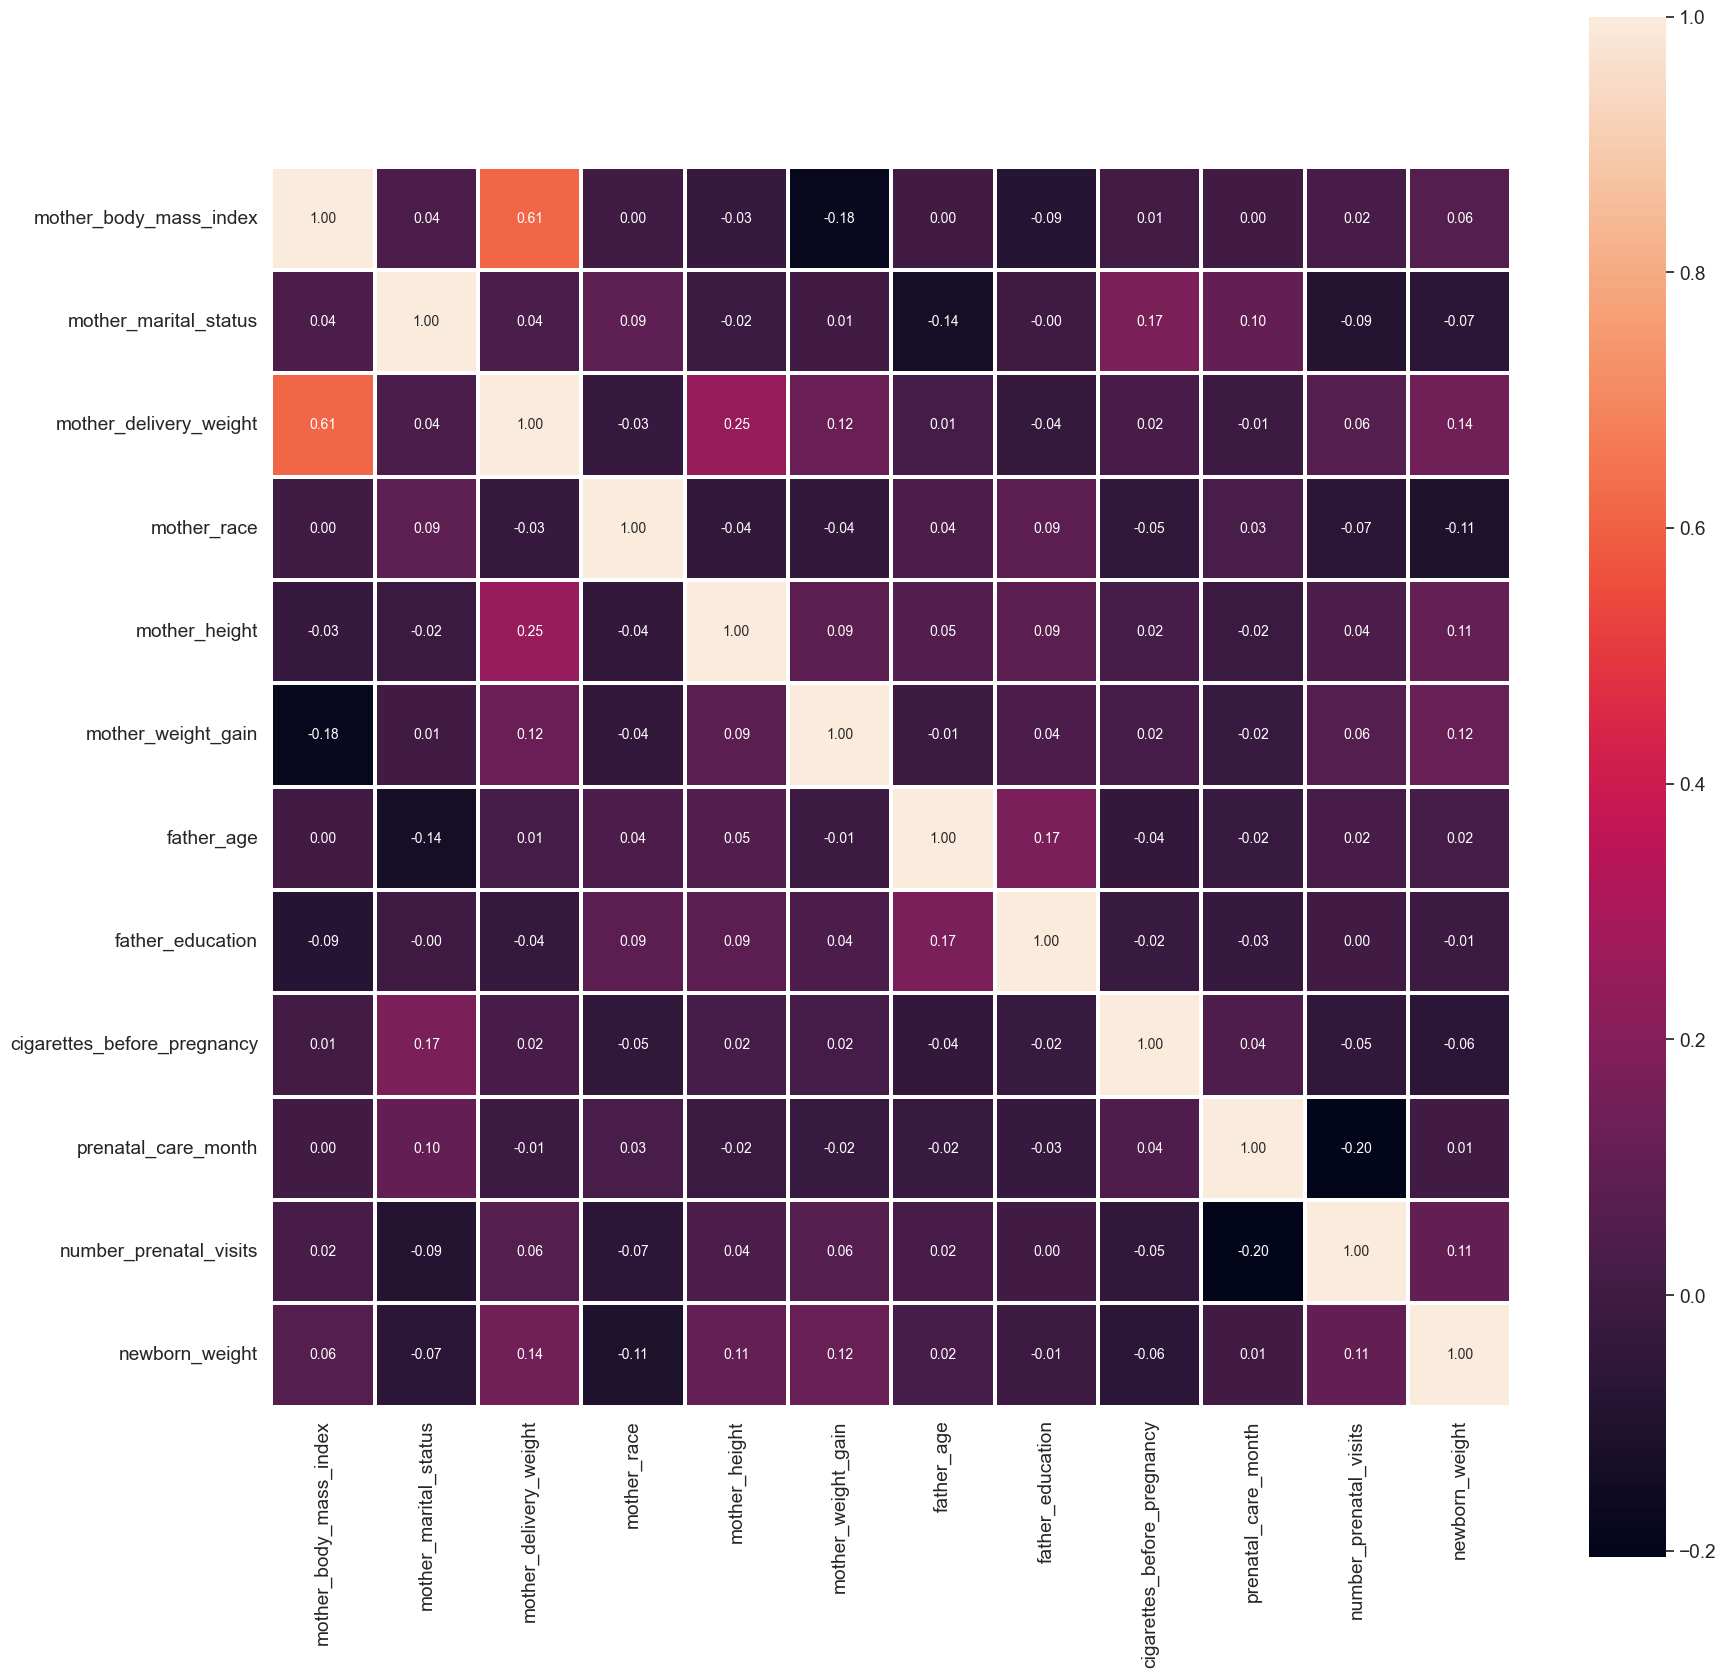

In [108]:
corr = df[cont].corr("kendall")
foo = pd.DataFrame(corr.abs().unstack().sort_values(ascending=False))
foo = foo[foo[0] != 1]
foo = foo[foo.duplicated() == False]
foo.head(10)

corr = df[cont].corr("kendall")
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()